11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 0.1454 - mse: 0.1305 - val_loss: 0.1125 - val_mse: 0.0984 - learning_rate: 1.0000e-04
Epoch 2/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0485 - mse: 0.0348 - val_loss: 0.0343 - val_mse: 0.0220 - learning_rate: 1.0000e-04
Epoch 3/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0342 - mse: 0.0223 - val_loss: 0.0278 - val_mse: 0.0172 - learning_rate: 1.0000e-04
Epoch 4/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0274 - mse: 0.0172 - val_loss: 0.0237 - val_mse: 0.0147 - learning_rate: 1.0000e-04
Epoch 5/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0234 - mse: 0.0148 - val_loss: 0.0211 - val_mse: 0.0135 - learning_rate: 1.0000e-04
Epoch 6/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0209 - mse: 0.0136 - val_loss: 0.0193 - val_mse: 0.0129 - learning_rate: 1.0000e-04
Epoch 7/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0190 - mse: 0.0129 - val_loss: 0.0180 - val_mse: 0.0125 - le

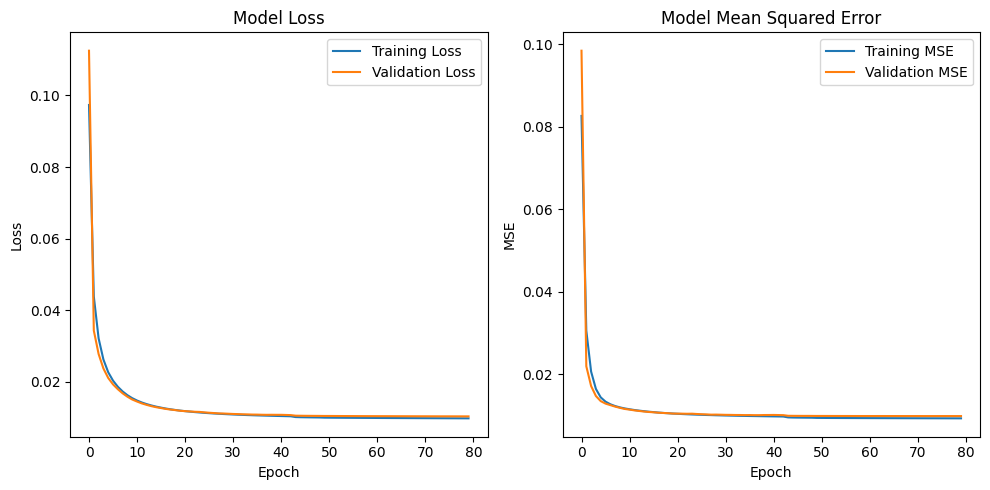

Saving Designer Clothes, Shoes & Bags for Women _ SSENSE.jpeg to Designer Clothes, Shoes & Bags for Women _ SSENSE.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


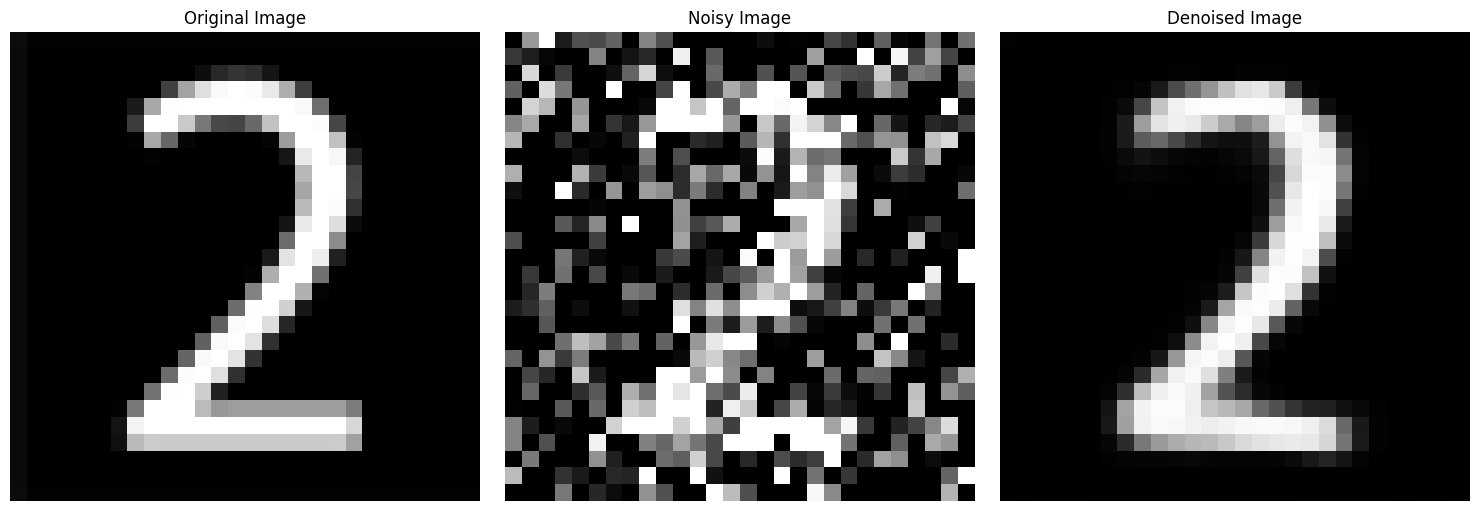

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from google.colab import files
from PIL import Image

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load and preprocess MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the advanced autoencoder model
model = Sequential([
    # Encoder network with regularization and batch normalization
    Conv2D(32, 3, activation='relu', padding='same',
           input_shape=(28, 28, 1),
           kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D(2, padding='same'),

    Conv2D(64, 3, activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D(2, padding='same'),

    # Decoder network
    Conv2D(64, 3, activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    UpSampling2D(2),

    Conv2D(32, 3, activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    UpSampling2D(2),

    # Output layer
    Conv2D(1, 3, activation='sigmoid', padding='same')
])

# Create optimizer with lower learning rate
optimizer = Adam(learning_rate=0.0001)

# Compile the model with Mean Squared Error loss
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

# Create callbacks for better training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001
)

# Train the model with callbacks
history = model.fit(
    x_train_noisy, x_train,
    epochs=65,
    batch_size=128,
    validation_data=(x_test_noisy, x_test),
    callbacks=[early_stopping, reduce_lr]
)

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.show()

# Function to load and preprocess custom image
def load_and_preprocess_image(image_path, target_size=(28, 28)):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize(target_size)  # Resize to 28x28 pixels
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

# Function to add noise to image
def add_noise(image_array, noise_factor=0.5):
    noisy_image = image_array + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=image_array.shape)
    return np.clip(noisy_image, 0.0, 1.0)

# Function to denoise the image
def denoise_image(image_path, noise_factor=0.5):
    # Load and preprocess original image
    original_image = load_and_preprocess_image(image_path)

    # Create noisy version
    noisy_image = add_noise(original_image, noise_factor)

    # Denoise the image
    denoised_image = model.predict(noisy_image)

    # Display results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(original_image[0, :, :, 0], cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Noisy Image')
    plt.imshow(noisy_image[0, :, :, 0], cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Denoised Image')
    plt.imshow(denoised_image[0, :, :, 0], cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Upload and denoise custom image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
denoise_image(image_path)